In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("D:\\Shreeram\\Projects\\xyz\\ML\\loan.csv")

In [5]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,Y


In [6]:
df.shape

(981, 13)

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [9]:
def explore_object_type(df ,feature_name):
    """
    To know, How many values available in object('categorical') type of features
    And Return Categorical values with Count.
    """    
    if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())

In [10]:
# Now, Test and Call a function for gender only
explore_object_type(df, 'Gender')

Gender
Male      775
Female    182
Name: count, dtype: int64


In [11]:
loan_train_columns = df.columns
loan_train_columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
# Solution is, Do you remember we have variable with name of `loan_train_columns`, Right,  let's use it
# 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'

for featureName in loan_train_columns:
    if df[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(df, str(featureName))


"Loan_ID's" Values with count are :
Loan_ID
LP001002    1
LP001183    1
LP001187    1
LP001190    1
LP001203    1
           ..
LP002098    1
LP002100    1
LP002101    1
LP002103    1
LP002989    1
Name: count, Length: 981, dtype: int64

"Gender's" Values with count are :
Gender
Male      775
Female    182
Name: count, dtype: int64

"Married's" Values with count are :
Married
Yes    631
No     347
Name: count, dtype: int64

"Dependents's" Values with count are :
Dependents
0     545
1     160
2     160
3+     91
Name: count, dtype: int64

"Education's" Values with count are :
Education
Graduate        763
Not Graduate    218
Name: count, dtype: int64

"Self_Employed's" Values with count are :
Self_Employed
No     807
Yes    119
Name: count, dtype: int64

"Property_Area's" Values with count are :
Property_Area
Semiurban    349
Urban        342
Rural        290
Name: count, dtype: int64

"Loan_Status's" Values with count are :
Loan_Status
Y    730
N    251
Name: count, dtype: int64


In [13]:
df.isna().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
df['Credit_History'].fillna(df['Credit_History'].mode(), inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)

In [15]:
df.Loan_Status = df.Loan_Status.replace({"Y": 1, "N" : 0})
df.Gender = df.Gender.replace({"Male": 1, "Female" : 0})
df.Married = df.Married.replace({"Yes": 1, "No" : 0})
df.Self_Employed = df.Self_Employed.replace({"Yes": 1, "No" : 0})

In [16]:
df['Self_Employed'].fillna(df['Self_Employed'].mean(), inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)

In [17]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
feature_col = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for col in feature_col:
    df[col] = le.fit_transform(df[col])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    int32  
 1   Gender             981 non-null    int64  
 2   Married            981 non-null    int64  
 3   Dependents         981 non-null    int32  
 4   Education          981 non-null    int32  
 5   Self_Employed      981 non-null    int64  
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    int32  
 12  Loan_Status        981 non-null    int64  
dtypes: float64(4), int32(4), int64(5)
memory usage: 84.4 KB


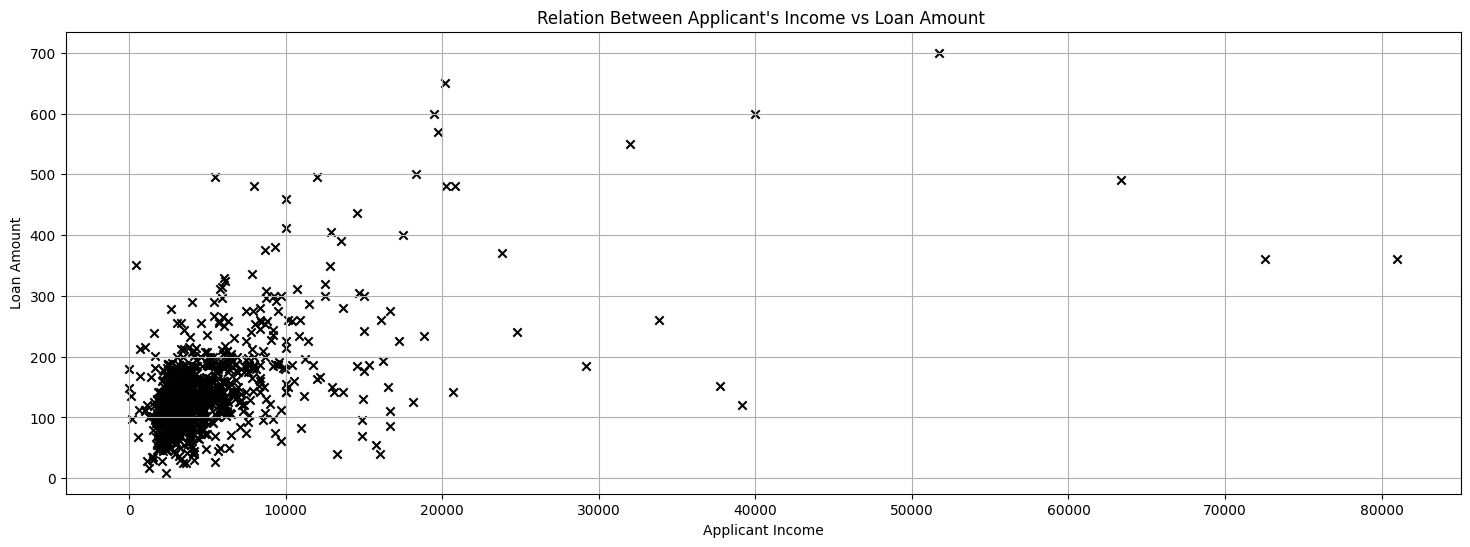

In [20]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicant's Income vs Loan Amount ")

plt.grid()
plt.scatter(df['ApplicantIncome'] , df['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

In [21]:
df1 = df.drop('Loan_ID', axis =1)

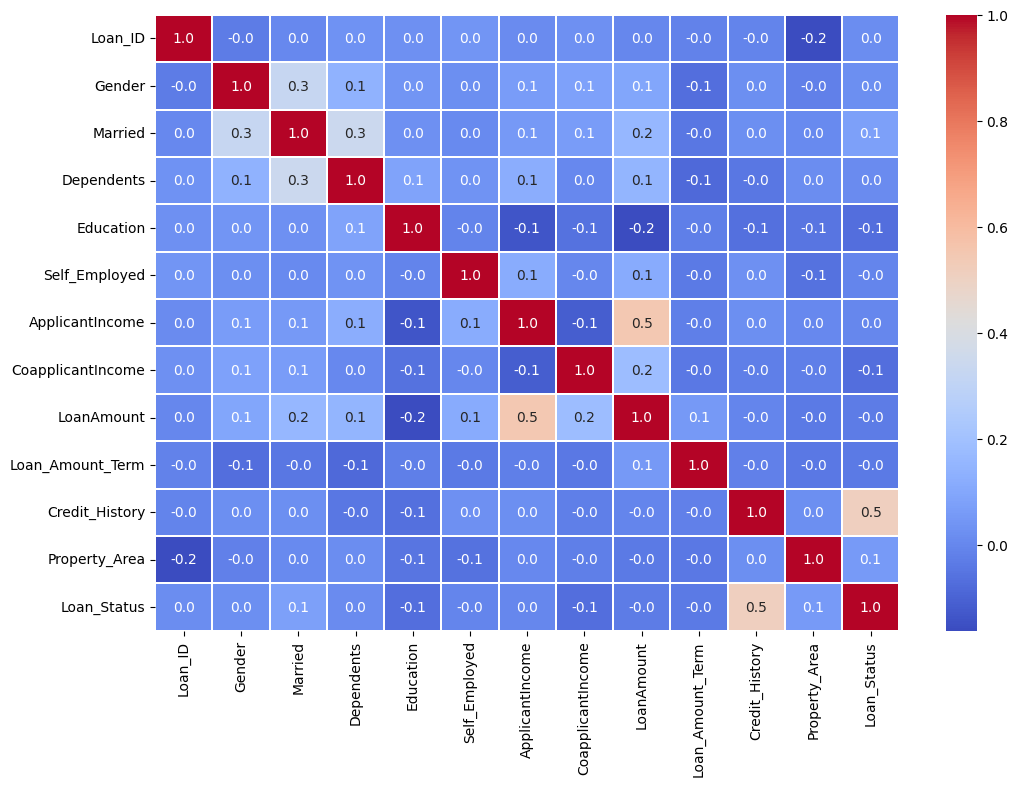

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [23]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,142.51153,360.0,1.00000,2,1
1,1,1,1,1,0,0,4583,1508.0,128.00000,360.0,1.00000,0,0
2,2,1,1,0,0,2,3000,0.0,66.00000,360.0,1.00000,2,1
3,3,1,1,0,1,0,2583,2358.0,120.00000,360.0,1.00000,2,1
4,4,1,0,0,0,0,6000,0.0,141.00000,360.0,1.00000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,970,1,1,3,1,2,4009,1777.0,113.00000,360.0,1.00000,2,1
977,972,1,1,0,0,0,4158,709.0,115.00000,360.0,1.00000,2,1
978,975,1,0,0,0,0,3250,1993.0,126.00000,360.0,0.83592,1,1
979,978,1,1,0,0,0,5000,2393.0,158.00000,360.0,1.00000,0,1


In [24]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [25]:
X = df[['Married', 'Self_Employed', 'ApplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y = df['Loan_Status']

In [26]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

In [27]:
X_ros, y_ros = ros.fit_resample(X, y)

In [28]:
X_ros.shape, y_ros.shape, y_ros.value_counts()

((1460, 7),
 (1460,),
 Loan_Status
 1    730
 0    730
 Name: count, dtype: int64)

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, stratify = y_ros, random_state = 1000)

In [119]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [120]:
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [121]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [122]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [123]:
y_pred = logreg.predict(X_test)

In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.52      0.64       182
           1       0.65      0.90      0.76       183

    accuracy                           0.71       365
   macro avg       0.75      0.71      0.70       365
weighted avg       0.75      0.71      0.70       365



In [125]:
from sklearn.ensemble import RandomForestClassifier
mdl = RandomForestClassifier()

In [126]:
mdl.fit(X_train, y_train)

RandomForestClassifier()

In [127]:
y_pred1 = mdl.predict(X_test)

In [128]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       182
           1       0.82      0.81      0.81       183

    accuracy                           0.81       365
   macro avg       0.81      0.81      0.81       365
weighted avg       0.81      0.81      0.81       365



In [129]:
confusion_matrix(y_test, y_pred1)

array([[149,  33],
       [ 35, 148]], dtype=int64)

In [130]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators' : [100,200,300,400,500,600,700,800,900,1000], 'max_depth' : range(8,30,2), 'criterion' : ['gini']}

In [131]:
grid = GridSearchCV(estimator = mdl, param_grid = params, scoring = 'accuracy', cv = 5)

In [132]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': range(8, 30, 2),
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000]},
             scoring='accuracy')

In [133]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 18, 'n_estimators': 500}

In [134]:
y_pred = grid.predict(X_test)

In [135]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       184
           1       0.81      0.82      0.82       181

    accuracy                           0.82       365
   macro avg       0.82      0.82      0.82       365
weighted avg       0.82      0.82      0.82       365



In [136]:
import pickle

with open("loan_prediction.pkl", "wb") as f:
    pickle.dump(grid, f)